# EV Vehicle Demand Prediction - Data Exploration
## Week 1: Comprehensive Data Analysis

This notebook contains comprehensive exploratory data analysis (EDA) of the Electric Vehicle dataset.

### Objectives:
- Load and clean the dataset
- Perform exploratory data analysis
- Create meaningful visualizations
- Extract insights for model development

In [27]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set style for visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print('Libraries imported successfully!')

Libraries imported successfully!


## 1. Data Loading

In [28]:
# Load the dataset
# Note: Update the filename if your CSV has a different name
df = pd.read_csv('../data/raw/EV DATASET.csv')

print('Dataset Shape:', df.shape)
print('\nColumn Names:')
print(df.columns.tolist())

Dataset Shape: (20819, 10)

Column Names:
['Date', 'County', 'State', 'Vehicle Primary Use', 'Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)', 'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles', 'Percent Electric Vehicles']


In [29]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

In [30]:
# Display first few rows
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [31]:
# Display basic statistics
df.describe()

,Percent Electric Vehicles
count,20819.000000
mean,4.139216
std,11.055350
min,0.000000
25%,0.390000
50%,1.220000
75%,2.995000
max,100.000000


In [32]:
# Check for missing values
print('Missing Values:')
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])
print('\nTotal missing values:', df.isnull().sum().sum())

Missing Values:
County    86
State     86
dtype: int64

Total missing values: 172


## 2. Data Cleaning and Type Conversion

In [33]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Convert string numbers with commas to numeric
numeric_columns = ['Battery Electric Vehicles (BEVs)', 
                   'Plug-In Hybrid Electric Vehicles (PHEVs)',
                   'Electric Vehicle (EV) Total', 
                   'Non-Electric Vehicle Total',
                   'Total Vehicles']

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col].astype(str).str.replace(',', ''), errors='coerce')

print('Data types after conversion:')
print(df.dtypes)

Data types after conversion:
Date                                        datetime64[ns]
County                                              object
State                                               object
Vehicle Primary Use                                 object
Battery Electric Vehicles (BEVs)                     int64
Plug-In Hybrid Electric Vehicles (PHEVs)             int64
Electric Vehicle (EV) Total                          int64
Non-Electric Vehicle Total                           int64
Total Vehicles                                       int64
Percent Electric Vehicles                          float64
dtype: object


## 3. Feature Engineering

In [34]:
# Extract time-based features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)

print('New features created successfully!')
print('\nNew columns:', ['Year', 'Month', 'Quarter', 'YearMonth', 'Season'])

New features created successfully!

New columns: ['Year', 'Month', 'Quarter', 'YearMonth', 'Season']


## 4. Exploratory Data Analysis - Visualizations

### 4.1 Temporal Analysis - EV Trends Over Time

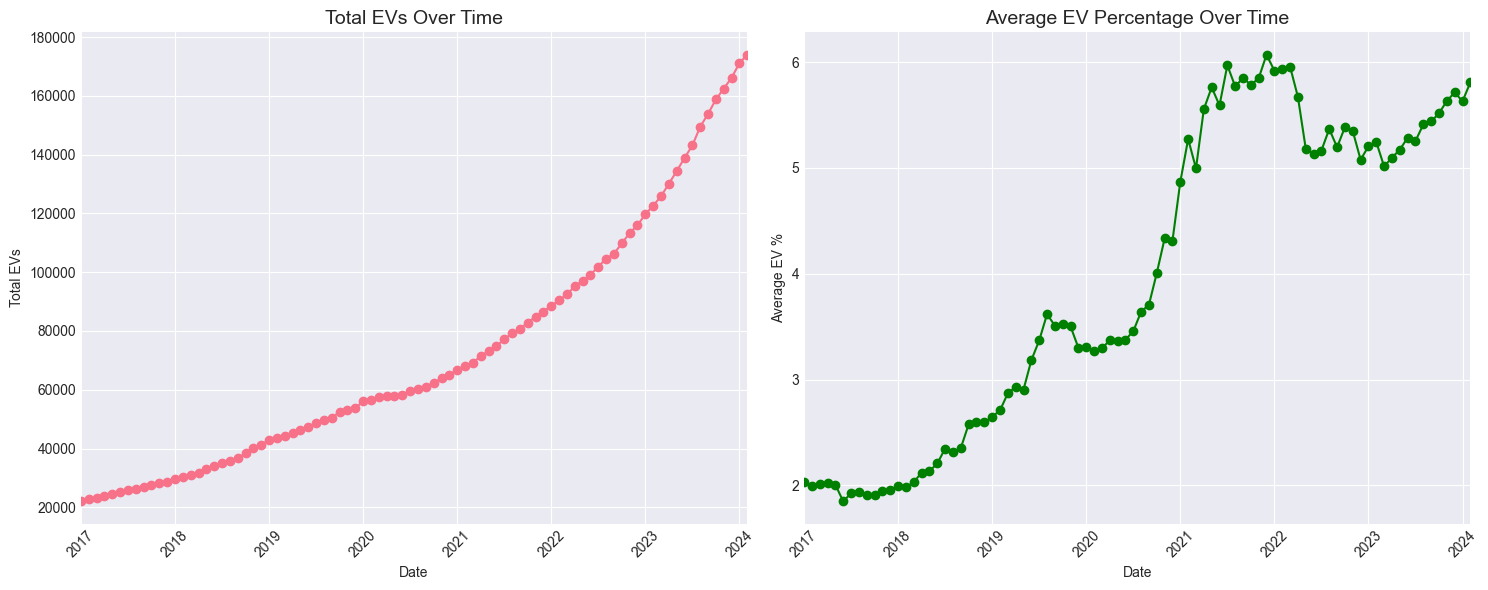

In [35]:
# Temporal Analysis - EV Trends Over Time
plt.figure(figsize=(15, 6))

# Total EVs over time
plt.subplot(1, 2, 1)
monthly_ev = df.groupby('YearMonth')['Electric Vehicle (EV) Total'].sum()
monthly_ev.plot(kind='line', marker='o')
plt.title('Total EVs Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Total EVs')
plt.xticks(rotation=45)

# Average EV percentage over time
plt.subplot(1, 2, 2)
monthly_pct = df.groupby('YearMonth')['Percent Electric Vehicles'].mean()
monthly_pct.plot(kind='line', marker='o', color='green')
plt.title('Average EV Percentage Over Time', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Average EV %')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../visualizations/temporal_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.2 Geographic Analysis - Top States by EV Adoption

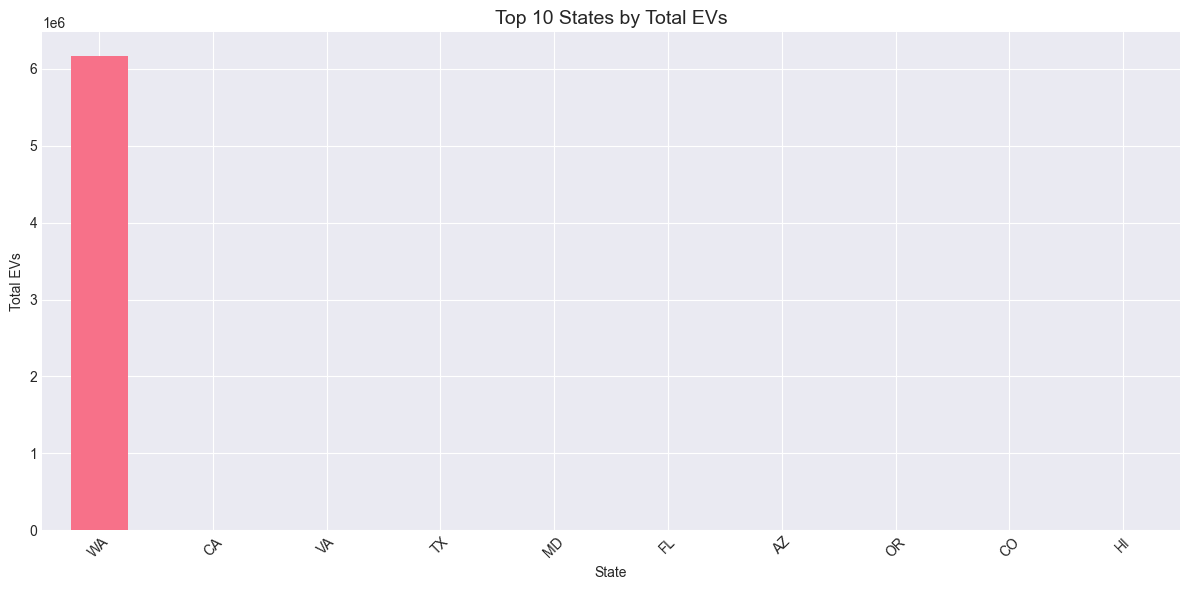

Top 10 States by EV Adoption:
WA: 6,166,610 EVs
CA: 6,892 EVs
VA: 3,160 EVs
TX: 2,113 EVs
MD: 1,520 EVs
FL: 1,501 EVs
AZ: 1,172 EVs
OR: 1,172 EVs
CO: 776 EVs
HI: 769 EVs


In [36]:
# Geographic Analysis - Top 10 States
plt.figure(figsize=(12, 6))

state_evs = df.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(10)
state_evs.plot(kind='bar')
plt.title('Top 10 States by Total EVs', fontsize=14)
plt.xlabel('State')
plt.ylabel('Total EVs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../visualizations/top_states.png', dpi=300, bbox_inches='tight')
plt.show()

# Print the values
print("Top 10 States by EV Adoption:")
for state, count in state_evs.items():
    print(f"{state}: {count:,.0f} EVs")

### 4.3 Vehicle Type Analysis

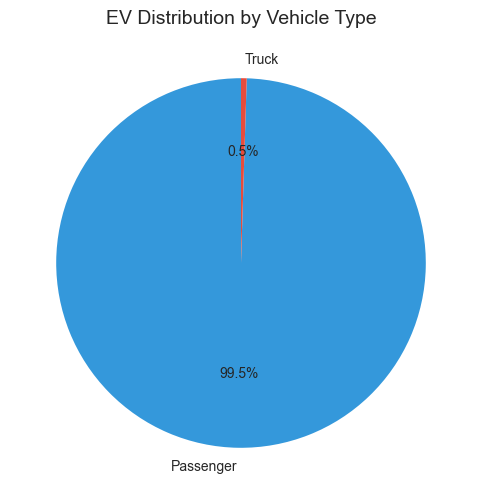

Total Passenger EVs: 6,164,648
Total Truck EVs: 30,667


In [37]:
# Vehicle Type Analysis
plt.figure(figsize=(10, 6))

vehicle_type_dist = df.groupby('Vehicle Primary Use')['Electric Vehicle (EV) Total'].sum()
colors = ['#3498db', '#e74c3c']
vehicle_type_dist.plot(kind='pie', autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('EV Distribution by Vehicle Type', fontsize=14)
plt.ylabel('')
plt.savefig('../visualizations/vehicle_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Total Passenger EVs: {vehicle_type_dist.get('Passenger', 0):,.0f}")
print(f"Total Truck EVs: {vehicle_type_dist.get('Truck', 0):,.0f}")

### 4.4 BEV vs PHEV Analysis

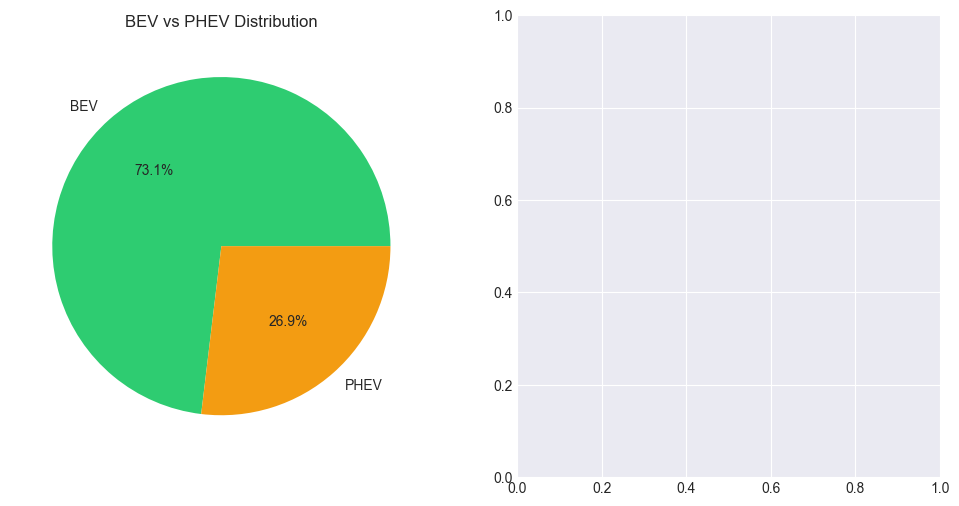

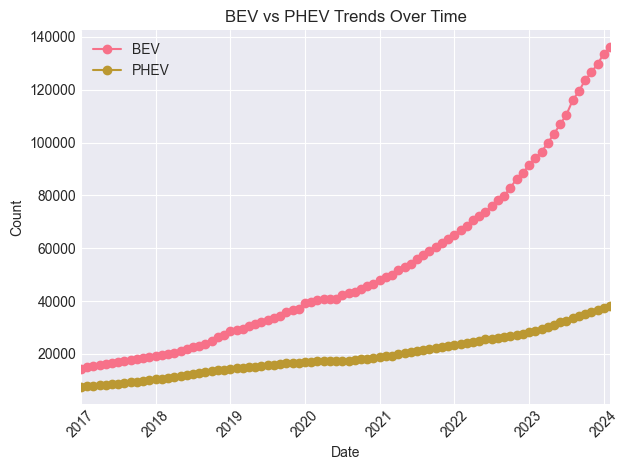

In [38]:
# BEV vs PHEV Analysis
plt.figure(figsize=(12, 6))

bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()

plt.subplot(1, 2, 1)
plt.pie([bev_total, phev_total], labels=['BEV', 'PHEV'], autopct='%1.1f%%', colors=['#2ecc71', '#f39c12'])
plt.title('BEV vs PHEV Distribution')

plt.subplot(1, 2, 2)
monthly_bev_phev = df.groupby('YearMonth')[['Battery Electric Vehicles (BEVs)', 
                                             'Plug-In Hybrid Electric Vehicles (PHEVs)']].sum()
monthly_bev_phev.plot(kind='line', marker='o')
plt.title('BEV vs PHEV Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(['BEV', 'PHEV'])
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('../visualizations/bev_vs_phev.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.5 Correlation Analysis

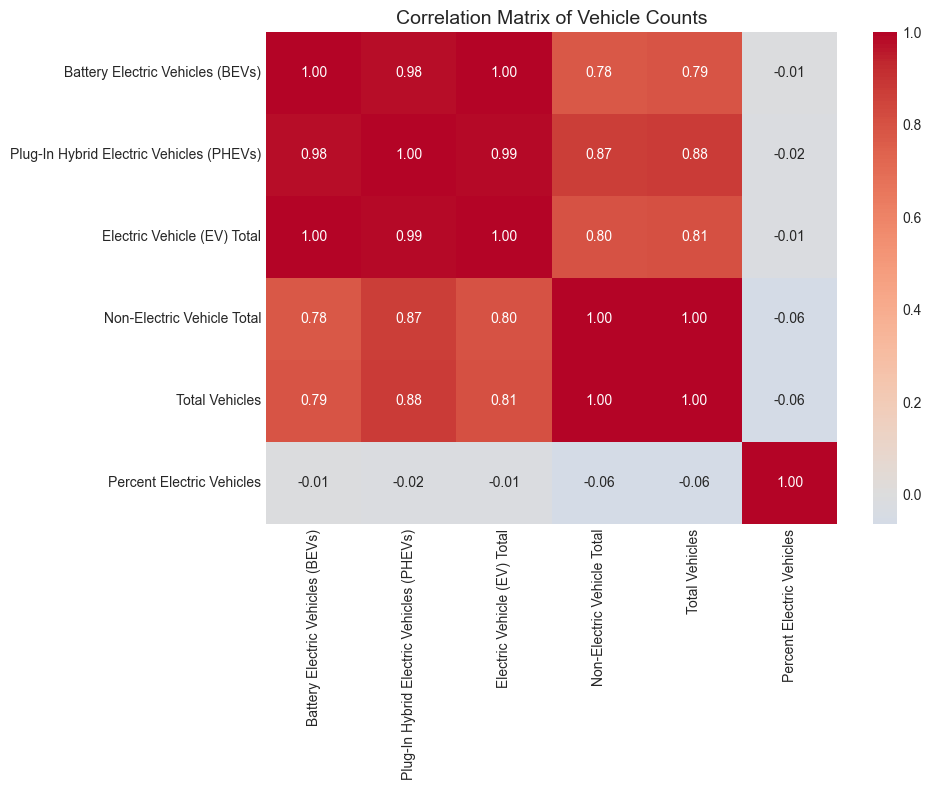

In [39]:
# Correlation Analysis
plt.figure(figsize=(10, 8))

# Select numeric columns for correlation
corr_columns = ['Battery Electric Vehicles (BEVs)', 
                'Plug-In Hybrid Electric Vehicles (PHEVs)',
                'Electric Vehicle (EV) Total', 
                'Non-Electric Vehicle Total',
                'Total Vehicles', 
                'Percent Electric Vehicles']

correlation_matrix = df[corr_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Vehicle Counts', fontsize=14)
plt.tight_layout()
plt.savefig('../visualizations/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.6 Seasonal Analysis

<Figure size 1200x600 with 0 Axes>

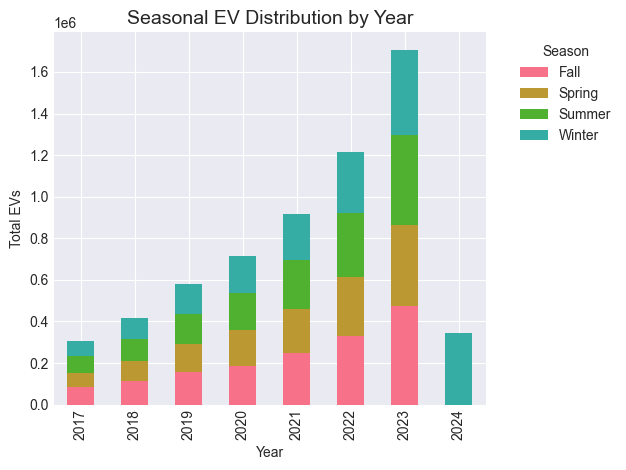

In [40]:
# Seasonal Analysis
plt.figure(figsize=(12, 6))

seasonal_evs = df.groupby(['Year', 'Season'])['Electric Vehicle (EV) Total'].sum().unstack()
seasonal_evs.plot(kind='bar', stacked=True)
plt.title('Seasonal EV Distribution by Year', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total EVs')
plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../visualizations/seasonal_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

### 4.7 Growth Rate Analysis

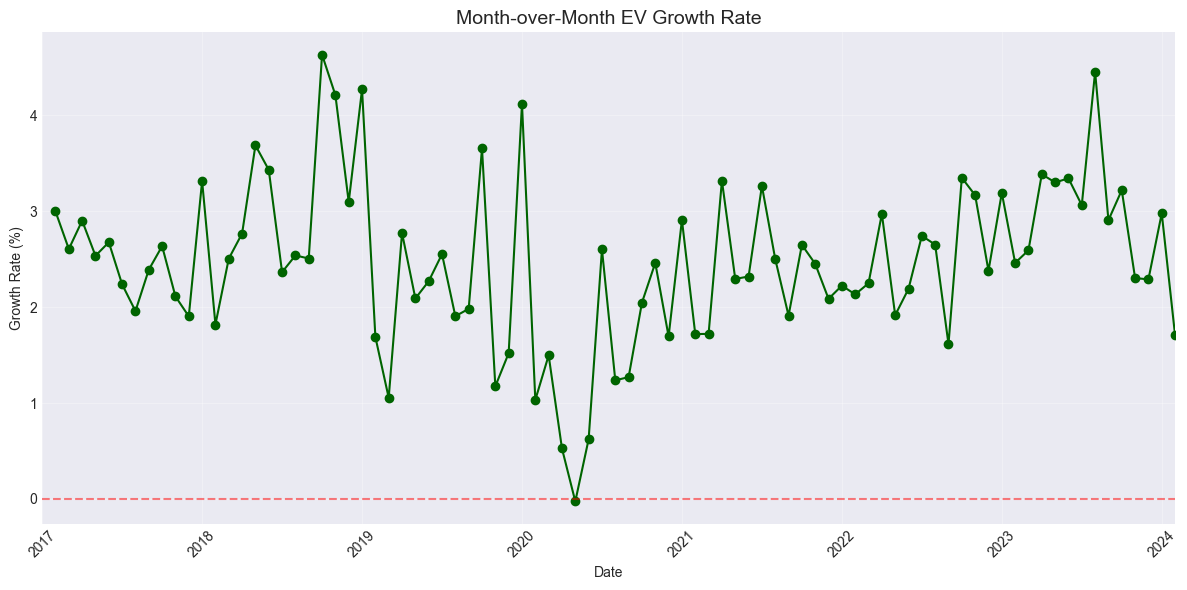

Average Monthly Growth Rate: 2.47%
Highest Growth Month: 2018-10 (4.63%)
Lowest Growth Month: 2020-05 (-0.03%)


In [41]:
# Growth Rate Analysis
monthly_total = df.groupby('YearMonth')['Electric Vehicle (EV) Total'].sum()
growth_rate = monthly_total.pct_change() * 100

plt.figure(figsize=(12, 6))
growth_rate.plot(kind='line', marker='o', color='darkgreen')
plt.title('Month-over-Month EV Growth Rate', fontsize=14)
plt.xlabel('Date')
plt.ylabel('Growth Rate (%)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../visualizations/growth_rate.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Average Monthly Growth Rate: {growth_rate.mean():.2f}%")
print(f"Highest Growth Month: {growth_rate.idxmax()} ({growth_rate.max():.2f}%)")
print(f"Lowest Growth Month: {growth_rate.idxmin()} ({growth_rate.min():.2f}%)")

### 4.8 Comprehensive Dashboard

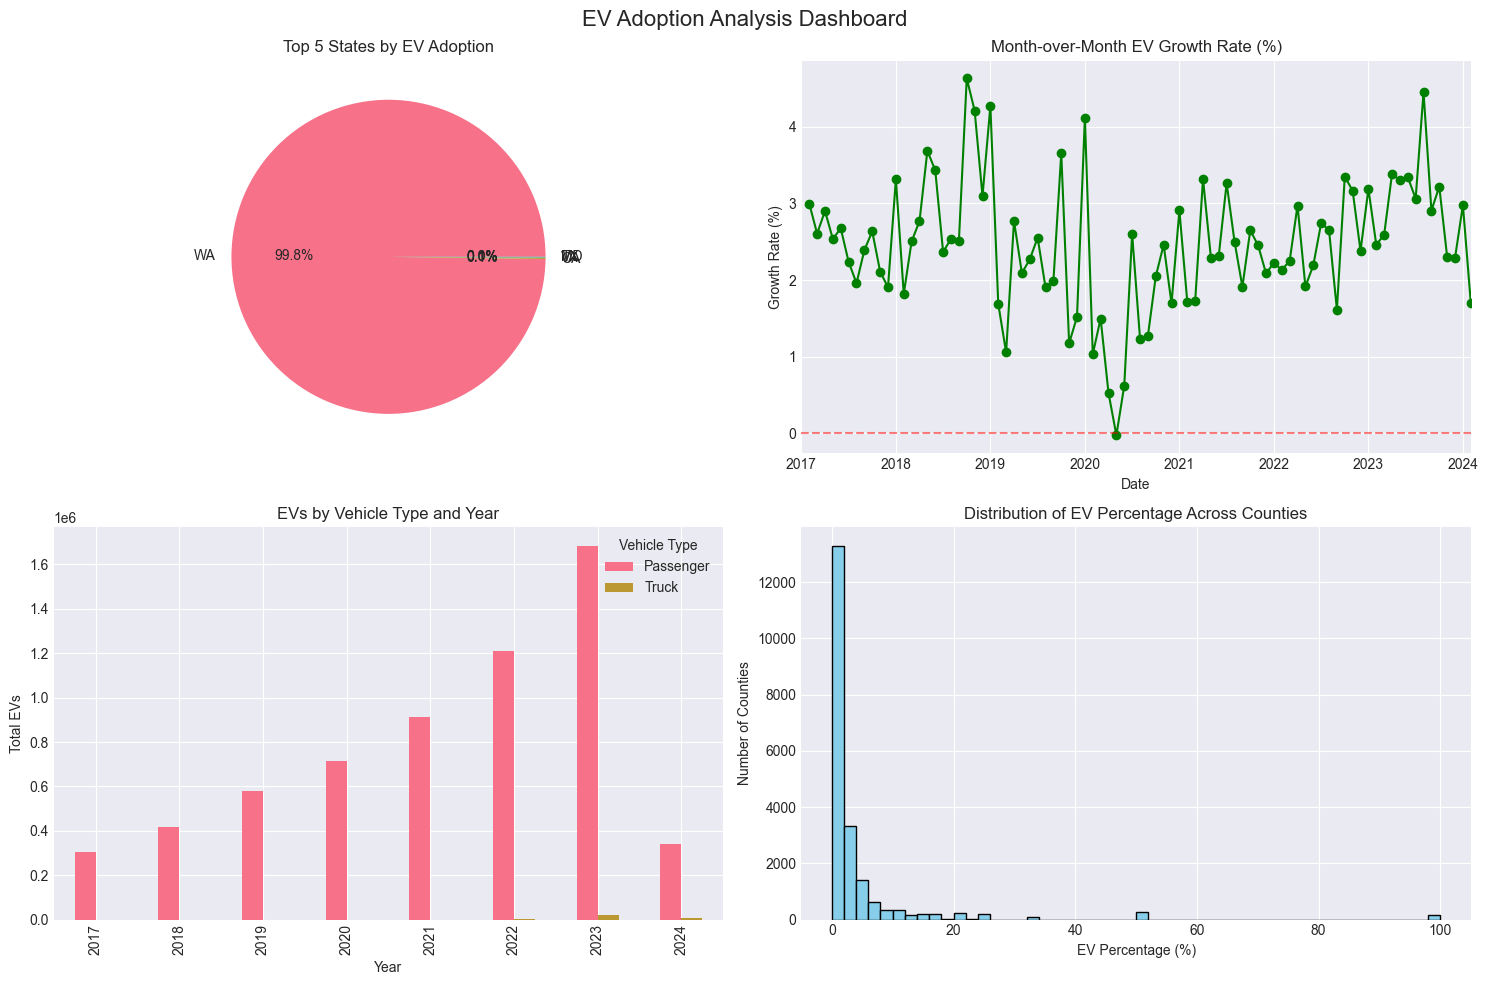

In [42]:
# Create a comprehensive dashboard-style visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('EV Adoption Analysis Dashboard', fontsize=16)

# 1. Top 5 states pie chart
ax1 = axes[0, 0]
top5_states = df.groupby('State')['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(5)
ax1.pie(top5_states.values, labels=top5_states.index, autopct='%1.1f%%')
ax1.set_title('Top 5 States by EV Adoption')

# 2. Monthly growth rate
ax2 = axes[0, 1]
monthly_total = df.groupby('YearMonth')['Electric Vehicle (EV) Total'].sum()
growth_rate = monthly_total.pct_change() * 100
growth_rate.plot(ax=ax2, kind='line', color='green', marker='o')
ax2.set_title('Month-over-Month EV Growth Rate (%)')
ax2.axhline(y=0, color='r', linestyle='--', alpha=0.5)
ax2.set_xlabel('Date')
ax2.set_ylabel('Growth Rate (%)')

# 3. Vehicle type by year
ax3 = axes[1, 0]
yearly_vehicle_type = df.groupby(['Year', 'Vehicle Primary Use'])['Electric Vehicle (EV) Total'].sum().unstack()
yearly_vehicle_type.plot(ax=ax3, kind='bar')
ax3.set_title('EVs by Vehicle Type and Year')
ax3.set_xlabel('Year')
ax3.set_ylabel('Total EVs')
ax3.legend(title='Vehicle Type')

# 4. EV percentage distribution
ax4 = axes[1, 1]
df['Percent Electric Vehicles'].hist(ax=ax4, bins=50, color='skyblue', edgecolor='black')
ax4.set_title('Distribution of EV Percentage Across Counties')
ax4.set_xlabel('EV Percentage (%)')
ax4.set_ylabel('Number of Counties')

plt.tight_layout()
plt.savefig('../visualizations/ev_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Summary Statistics and Key Insights

In [43]:
# Summary Statistics
print("=== EV DATASET SUMMARY ===")
print(f"Date Range: {df['Date'].min().strftime('%B %Y')} to {df['Date'].max().strftime('%B %Y')}")
print(f"Total Number of States: {df['State'].nunique()}")
print(f"Total Number of Counties: {df['County'].nunique()}")
print(f"Total EVs in Dataset: {df['Electric Vehicle (EV) Total'].sum():,.0f}")
print(f"Average EV Percentage: {df['Percent Electric Vehicles'].mean():.2f}%")
print(f"Maximum EV Percentage: {df['Percent Electric Vehicles'].max():.2f}%")

# Counties with highest EV adoption
print("\n=== TOP 5 COUNTIES BY EV ADOPTION ===")
top_counties = df.groupby(['County', 'State'])['Electric Vehicle (EV) Total'].sum().sort_values(ascending=False).head(5)
for (county, state), count in top_counties.items():
    print(f"{county}, {state}: {count:,.0f} EVs")

# Vehicle type breakdown
print("\n=== VEHICLE TYPE BREAKDOWN ===")
vehicle_breakdown = df.groupby('Vehicle Primary Use')['Electric Vehicle (EV) Total'].sum()
for vehicle_type, count in vehicle_breakdown.items():
    percentage = (count / vehicle_breakdown.sum()) * 100
    print(f"{vehicle_type}: {count:,.0f} EVs ({percentage:.1f}%)")

# BEV vs PHEV breakdown
print("\n=== BEV vs PHEV BREAKDOWN ===")
bev_total = df['Battery Electric Vehicles (BEVs)'].sum()
phev_total = df['Plug-In Hybrid Electric Vehicles (PHEVs)'].sum()
print(f"Battery Electric Vehicles (BEVs): {bev_total:,.0f} ({bev_total/(bev_total+phev_total)*100:.1f}%)")
print(f"Plug-In Hybrid Electric Vehicles (PHEVs): {phev_total:,.0f} ({phev_total/(bev_total+phev_total)*100:.1f}%)")

=== EV DATASET SUMMARY ===
Date Range: January 2017 to February 2024
Total Number of States: 50
Total Number of Counties: 311
Total EVs in Dataset: 6,195,315
Average EV Percentage: 4.14%
Maximum EV Percentage: 100.00%

=== TOP 5 COUNTIES BY EV ADOPTION ===
King, WA: 3,309,850 EVs
Snohomish, WA: 683,598 EVs
Pierce, WA: 456,003 EVs
Clark, WA: 350,744 EVs
Kitsap, WA: 214,711 EVs

=== VEHICLE TYPE BREAKDOWN ===
Passenger: 6,164,648 EVs (99.5%)
Truck: 30,667 EVs (0.5%)

=== BEV vs PHEV BREAKDOWN ===
Battery Electric Vehicles (BEVs): 4,528,470 (73.1%)
Plug-In Hybrid Electric Vehicles (PHEVs): 1,666,845 (26.9%)


## 6. Data Quality Report

In [44]:
# Data Quality Report
print("=== DATA QUALITY REPORT ===")
print(f"Total Records: {len(df):,}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")

# Check for outliers in EV percentage
print("\n=== OUTLIER ANALYSIS ===")
q1 = df['Percent Electric Vehicles'].quantile(0.25)
q3 = df['Percent Electric Vehicles'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['Percent Electric Vehicles'] < lower_bound) | (df['Percent Electric Vehicles'] > upper_bound)]
print(f"Number of outliers in EV Percentage: {len(outliers)}")
print(f"Outlier range: below {lower_bound:.2f}% or above {upper_bound:.2f}%")

=== DATA QUALITY REPORT ===
Total Records: 20,819
Missing Values: 172
Duplicate Rows: 0

=== OUTLIER ANALYSIS ===
Number of outliers in EV Percentage: 2476
Outlier range: below -3.52% or above 6.90%


## 7. Save Processed Data

In [45]:
# Save the processed dataset with new features
df.to_csv('../data/processed/processed_ev_data.csv', index=False)
print("Processed data saved to '../data/processed/processed_ev_data.csv'")

# Create a summary report
summary_report = {
    'Date Range': f"{df['Date'].min()} to {df['Date'].max()}",
    'Total Records': len(df),
    'Total States': df['State'].nunique(),
    'Total Counties': df['County'].nunique(),
    'Total EVs': df['Electric Vehicle (EV) Total'].sum(),
    'Average EV Percentage': df['Percent Electric Vehicles'].mean(),
    'Top State': df.groupby('State')['Electric Vehicle (EV) Total'].sum().idxmax(),
    'Features Created': ['Year', 'Month', 'Quarter', 'YearMonth', 'Season']
}

# Save summary report
import json
with open('../results/week1_summary.json', 'w') as f:
    json.dump(summary_report, f, indent=4, default=str)
print("\nSummary report saved to '../results/week1_summary.json'")

Processed data saved to '../data/processed/processed_ev_data.csv'

Summary report saved to '../results/week1_summary.json'


## 8. Next Steps for Week 2

Based on our analysis, here are the recommendations for Week 2:

1. **Feature Engineering:**
   - Create lag features (1, 3, 6, 12 months)
   - Add rolling averages
   - Include external features (population, income data)

2. **Model Development:**
   - Start with baseline models (Linear Regression, Random Forest)
   - Implement time series models (ARIMA, Prophet)
   - Try advanced models (XGBoost, LightGBM)

3. **Validation Strategy:**
   - Time-based train-test split
   - Cross-validation for model selection
   - Define evaluation metrics (MAE, RMSE, MAPE)

4. **Focus Areas:**
   - State-level vs County-level predictions
   - Separate models for BEV and PHEV
   - Seasonal patterns consideration

In [46]:
print("\n✅ Week 1 Analysis Complete!")
print("\n📊 Visualizations saved in ../visualizations/")
print("💾 Processed data saved in ../data/processed/")
print("📋 Summary report saved in ../results/")
print("\n🚀 Ready for Week 2: Model Development!")


✅ Week 1 Analysis Complete!

📊 Visualizations saved in ../visualizations/
💾 Processed data saved in ../data/processed/
📋 Summary report saved in ../results/

🚀 Ready for Week 2: Model Development!
